In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%load_ext autoreload
%autoreload 2


In [34]:
import numpy as np
import pprint
import random
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import connect_four
import q_learning

def array2tuple(array):
    return tuple(tuple(a) for a in array)

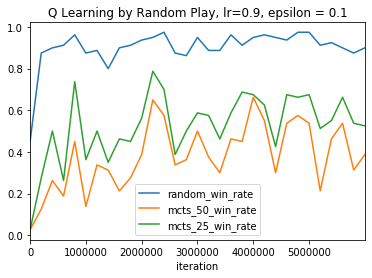

In [114]:
experiment_name = "Q_random_play"
exp_title = "Q Learning by Random Play, lr=0.9, epsilon = 0.1"
df_path = "experiments/{}/training_df.p".format(experiment_name)
f = pd.read_pickle(df_path)

f.plot.line(x="iteration", y=["random_win_rate", "mcts_50_win_rate", "mcts_25_win_rate"], title=exp_title)

# Random Opponent Simulated Games

In [50]:
def minQ(x, Q_dict):
    best_control = None
    smallest_Q = None
    controls = connect_four.ConnectFour.get_valid_inputs(x)
    random.shuffle(controls)
    for u in controls:
        if (x, u) in Q_dict:
            if smallest_Q is None or Q_dict[(x, u)] < smallest_Q:
                smallest_Q = Q_dict[(x, u)]
                best_control = u 

    return best_control, smallest_Q

In [28]:
experiment_name = "Q_lr_09_ep15"
Q_dict_path = "experiments/{}/Q_function.p".format(experiment_name)
print(Q_dict_path)
Q_dict_trained = pickle.load(open(Q_dict_path, 'rb'))

experiments/Q_lr_09_ep15/Q_function.p


|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  .  .  .  .  |


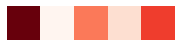

|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  o  .  .  .  |

|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  o  x  .  .  |



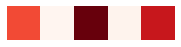

|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  o  .  .  .  |
|  .  o  x  .  .  |

|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  o  .  .  .  |
|  .  o  x  x  .  |



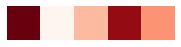

|  .  .  .  .  .  |
|  .  o  .  .  .  |
|  .  o  .  .  .  |
|  .  o  x  x  .  |

|  .  .  .  .  .  |
|  .  o  .  .  .  |
|  .  o  .  .  .  |
|  .  o  x  x  x  |



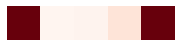

|  .  o  .  .  .  |
|  .  o  .  .  .  |
|  .  o  .  .  .  |
|  .  o  x  x  x  |


In [90]:
curr_player = 1
cf_game = connect_four.ConnectFour(5,4)
cf_game.print_board()

while True:

    curr_state_tuple = array2tuple(cf_game.board_state)
    # AI's turn
    if curr_player == 1:
        move, _ = minQ(curr_state_tuple, Q_dict_trained)
        # if Q does not have an entry for the current state x, just pick a random move
        if move is None:
            print("RANDOM MOVE *****************")
            unexplored_rate += 1
            move = random.choice(cf_game.get_valid_inputs(cf_game.board_state))

    # opponent's turn
    else:
        move = random.choice(cf_game.get_valid_inputs(cf_game.board_state))
    
    if curr_player == 1:
        choice_arr = [[Q_dict_trained[(curr_state_tuple,u)] for u in cf_game.get_valid_inputs(cf_game.board_state)]]
        fig, ax = plt.subplots(figsize=(3, 1))
        ax.imshow(choice_arr, cmap='Reds', interpolation='nearest')
        plt.axis('off')
        plt.show()
    
    cf_game.update_board(move, curr_player)
    cf_game.print_board()
    game_outcome = cf_game.get_status()
    if game_outcome != 0:
        break

    # switch to next player
    curr_player = 2 if curr_player == 1 else 1
    print("")

# Self-Play Simulated Games

|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  .  .  .  .  |


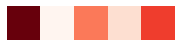

|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  o  .  .  .  |

|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  o  .  x  .  |



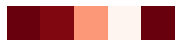

|  .  .  .  .  .  |
|  .  .  .  .  .  |
|  .  .  .  o  .  |
|  .  o  .  x  .  |

|  .  .  .  .  .  |
|  .  .  .  x  .  |
|  .  .  .  o  .  |
|  .  o  .  x  .  |



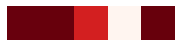

|  .  .  .  o  .  |
|  .  .  .  x  .  |
|  .  .  .  o  .  |
|  .  o  .  x  .  |

|  .  .  .  o  .  |
|  .  .  .  x  .  |
|  .  .  .  o  .  |
|  .  o  .  x  x  |



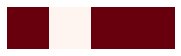

|  .  .  .  o  .  |
|  .  .  .  x  .  |
|  .  o  .  o  .  |
|  .  o  .  x  x  |

|  .  .  .  o  .  |
|  .  .  .  x  .  |
|  .  o  .  o  .  |
|  .  o  x  x  x  |



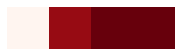

|  .  .  .  o  .  |
|  .  .  .  x  .  |
|  .  o  .  o  .  |
|  o  o  x  x  x  |

|  .  .  .  o  .  |
|  .  x  .  x  .  |
|  .  o  .  o  .  |
|  o  o  x  x  x  |



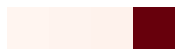

|  .  .  .  o  .  |
|  .  x  .  x  .  |
|  o  o  .  o  .  |
|  o  o  x  x  x  |

|  .  .  .  o  .  |
|  x  x  .  x  .  |
|  o  o  .  o  .  |
|  o  o  x  x  x  |



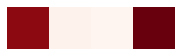

|  .  .  .  o  .  |
|  x  x  .  x  .  |
|  o  o  o  o  .  |
|  o  o  x  x  x  |


In [111]:
curr_player = 1
cf_game = connect_four.ConnectFour(5,4)
cf_game.print_board()
epsilon = 0.2

while True:

    curr_state_tuple = array2tuple(cf_game.board_state)
    # AI's turn
    if curr_player == 1:
        move, _ = minQ(curr_state_tuple, Q_dict_trained)
        # if Q does not have an entry for the current state x, just pick a random move
        if move is None:
            print("RANDOM MOVE *****************")
            unexplored_rate += 1
            move = random.choice(cf_game.get_valid_inputs(cf_game.board_state))

    # opponent's turn
    else:
        #move = random.choice(cf_game.get_valid_inputs(cf_game.board_state))
        move, _ = minQ(curr_state_tuple, Q_dict_trained)
        # if Q does not have an entry for the current state x, just pick a random move
        if move is None:
            print("RANDOM MOVE *****************")
            unexplored_rate += 1
            move = random.choice(cf_game.get_valid_inputs(cf_game.board_state))
        
        if random.uniform(0,1) < epsilon:
            move = random.choice(connect_four.ConnectFour.get_valid_inputs(curr_state_tuple))
    
    if curr_player == 1:
        choice_arr = [[Q_dict_trained[(curr_state_tuple,u)] for u in cf_game.get_valid_inputs(cf_game.board_state)]]
        fig, ax = plt.subplots(figsize=(3, 1))
        ax.imshow(choice_arr, cmap='Reds', interpolation='nearest')
        plt.axis('off')
        plt.show()
    
    cf_game.update_board(move, curr_player)
    cf_game.print_board()
    game_outcome = cf_game.get_status()
    if game_outcome != 0:
        break

    # switch to next player
    curr_player = 2 if curr_player == 1 else 1
    print("")